In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [25]:
Water_Spring_Lupa = pd.read_csv('./datasets/Water_Spring_Lupa.csv')


In [26]:
Water_Spring_Lupa

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN
...,...,...,...
4194,26/06/2020,0.000,-73.93
4195,27/06/2020,0.000,-73.60
4196,28/06/2020,0.000,-73.14
4197,29/06/2020,0.000,-72.88


In [27]:
Water_Spring_Lupa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4199 non-null   object 
 1   Rainfall_Terni  4199 non-null   float64
 2   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


In [28]:
Water_Spring_Lupa.shape

(4199, 3)

### Filled Entries

<AxesSubplot:>

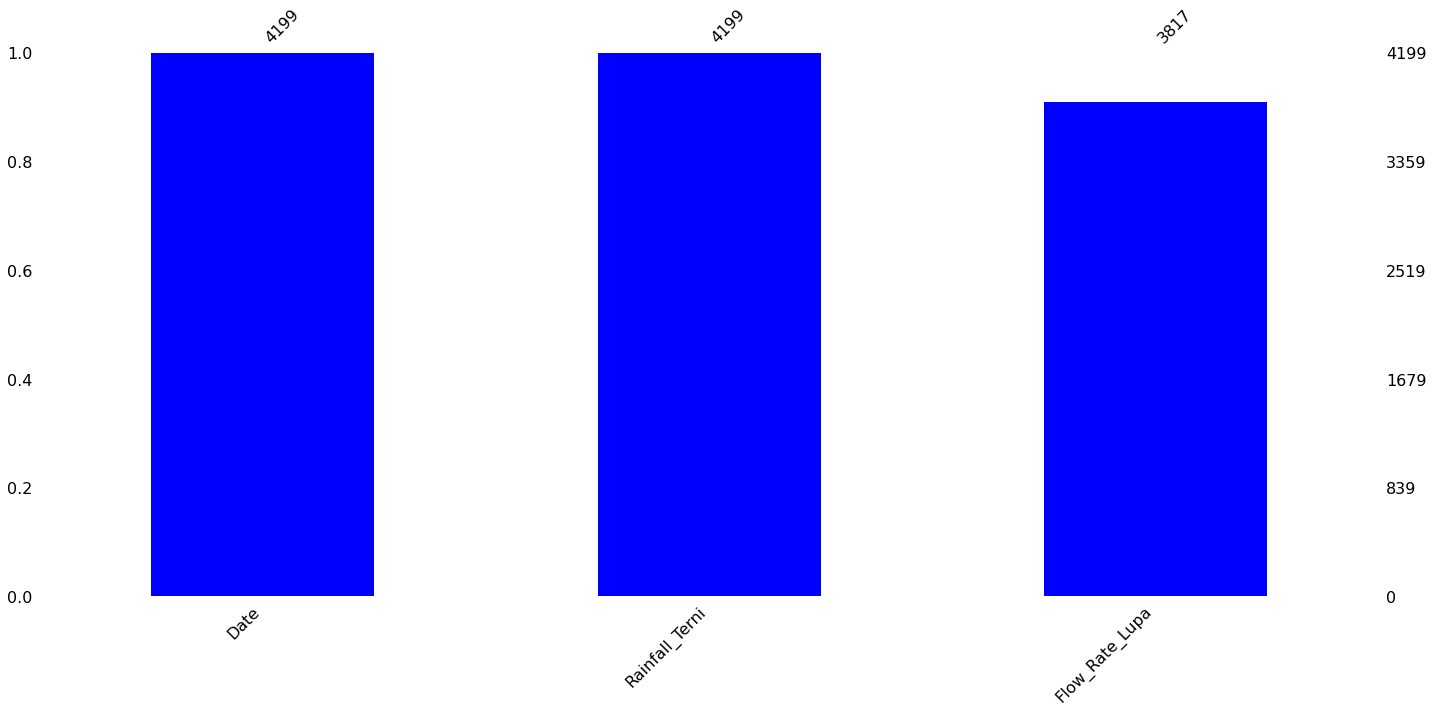

In [29]:
msno.bar(Water_Spring_Lupa,color='b')

### Dates starting and ending values

In [30]:
print('starting date:', Water_Spring_Lupa.Date.values[[0,-1]][0])
print('ending date:', Water_Spring_Lupa.Date.values[[0,-1]][1])


starting date: 01/01/2009
ending date: 30/06/2020


### Position of Null values

<AxesSubplot:>

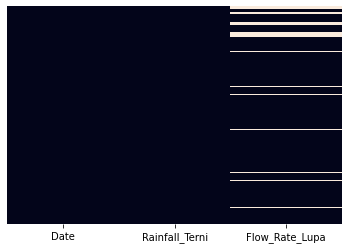

In [31]:
sns.heatmap(Water_Spring_Lupa.isnull(),yticklabels=False,cbar=False)

In [32]:
data=Water_Spring_Lupa.copy()
data.drop('Date',axis=1,inplace=True)

### Feature Selection

<AxesSubplot:>

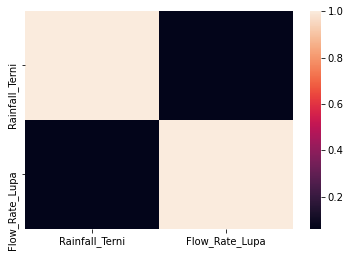

In [33]:
sns.heatmap(data.corr())

In [34]:
file = Water_Spring_Lupa
features_nan=[features for features in file.columns if file[features].isnull().sum()>1 and file[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(file[feature].isnull().mean()*100,4),'% missing ')

Flow_Rate_Lupa 9.0974 % missing 


In [35]:
'''
Columns that are going to be dropped

NO COLUMNS TO BE DROPPPED

'''

'\nColumns that are going to be dropped\n\nNO COLUMNS TO BE DROPPPED\n\n'

In [36]:
a = Water_Spring_Lupa

features_nan=[features for features in a.columns if a[features].isnull().sum()>1 and a[features].dtypes!='O']
for feature in features_nan:
    print(feature, np.round(a[feature].isnull().mean()*100,4),'% missing ')

Flow_Rate_Lupa 9.0974 % missing 


In [37]:
Water_Spring_Lupa

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN
...,...,...,...
4194,26/06/2020,0.000,-73.93
4195,27/06/2020,0.000,-73.60
4196,28/06/2020,0.000,-73.14
4197,29/06/2020,0.000,-72.88


### Imputation

In [38]:
def cal(x):
    null_values=x.isnull().sum()
    count_values=x.value_counts().unique
    mean=x.mean()
    median=x.median()
    mode=x.mode()
    print('null_values: ',null_values,'count_values: ', count_values, 'mean: ',mean,'median: ', median,'mode: ',mode, sep=' \n  ' )
    return

Flow_Rate_Lupa 

In [39]:
x=a['Flow_Rate_Lupa']
cal(x)

null_values:  
  382 
  count_values:  
  <bound method Series.unique of -113.96    3
-87.86     3
-101.89    3
-102.50    3
-104.49    3
          ..
-89.52     1
-89.55     1
-89.56     1
-89.57     1
-72.55     1
Name: Flow_Rate_Lupa, Length: 3631, dtype: int64> 
  mean:  
  -97.71291590254127 
  median:  
  -96.59 
  mode:  
  0   -113.96
1   -104.49
2   -102.50
3   -101.89
4    -87.86
5    -87.42
dtype: float64


In [42]:
a['Flow_Rate_Lupa']=a['Flow_Rate_Lupa'].fillna(a['Flow_Rate_Lupa'].mode()[0])

In [43]:
a.isnull().sum()

Date              0
Rainfall_Terni    0
Flow_Rate_Lupa    0
dtype: int64